In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture


In [2]:
means = np.array([[0, 0], [5, 5], [-5, 5]])
covariances = np.array([
    [[1, 0.5], [0.5, 1]],
    [[1, -0.3], [-0.3, 1]],
    [[0.5, 0], [0, 0.5]]
])
weights = [0.4, 0.35, 0.25]

# Gaussian Mixture Model
gmm = GaussianMixture(
    n_components=3,
    covariance_type="full"
)

# Manually setting parameters
gmm.weights_ = np.array(weights)
gmm.means_ = means
gmm.covariances_ = covariances
gmm.precisions_cholesky_ = np.linalg.cholesky(np.linalg.inv(covariances))


In [3]:
np.random.seed(42)
num_samples = 10000

samples, labels = gmm.sample(num_samples)
log_density_true = gmm.score_samples(samples)


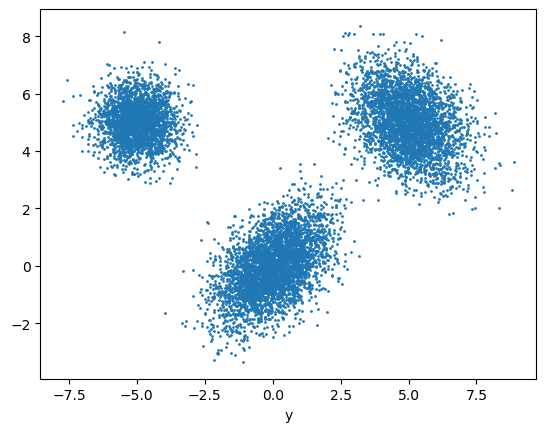

In [4]:
plt.scatter(samples[:,0], samples[:,1], s=1)
plt.xlabel("x")
plt.xlabel("y")
plt.show()


In [16]:
Nsamples = 100
x = np.linspace(-10,10,Nsamples)
y = np.linspace(-10,10,Nsamples)
XX, YY = np.meshgrid(x, y)
XY = np.column_stack((XX.ravel(), YY.ravel()))

Z = gmm.score_samples(XY)
Z = Z.reshape(Nsamples,Nsamples)

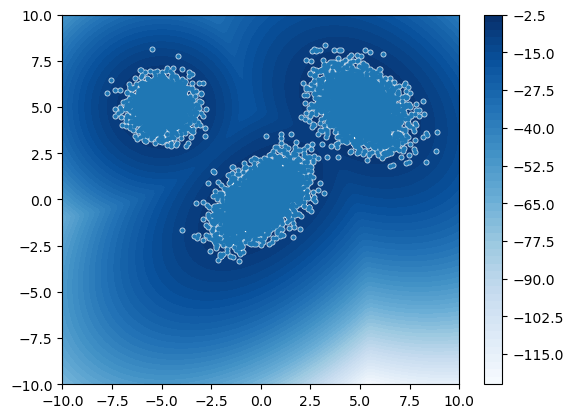

In [43]:
fig = plt.contourf(XX, YY, Z, levels=50, cmap="Blues")
plt.scatter(samples[:,0], samples[:,1], s=10, color='w')
plt.scatter(samples[:,0], samples[:,1], s=5)
plt.colorbar(fig)
plt.show()


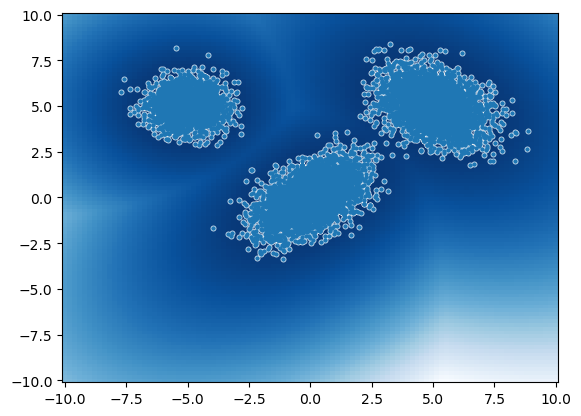

In [44]:
plt.pcolormesh(XX, YY, Z, cmap="Blues")
plt.scatter(samples[:,0], samples[:,1], s=10, color='w')
plt.scatter(samples[:,0], samples[:,1], s=5)